In [2]:
import numpy as np
import pandas as pd

# Głoski
GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')

# Wczytanie danych
data = np.genfromtxt('151879-clustersel.txt', delimiter='\t')
print("Data shape:", data.shape)

# Podział na dane i etykiety
X = data[:, :-1]
y = data[:, -1].astype(int)

# Etykiety tekstowe (np. 'a1', 'e2', ...)
etykiety = [GLOSKI[nr % 100] + str(nr // 100) for nr in y]

# Stworzenie DataFrame
df = pd.DataFrame(X)
df['etykieta'] = etykiety

# Wyświetlenie pierwszych 10 wierszy
print(df.head(10))


Data shape: (48, 64)
         0        1        2        3         4         5         6        7  \
0  3.68530  3.81710  4.03370  3.91140  2.526900  0.765900  0.123920  0.14222   
1  3.98630  4.52020  3.84840  1.05730  1.471400  2.455400  1.274300  0.81214   
2  5.50130  5.29400  1.62550  0.14931  0.052213  0.152440  0.176420  0.19013   
3  4.40800  5.45010  3.74130  1.44520  0.302000  0.063707  0.058881  0.13109   
4  5.13740  5.55410  2.62940  0.59237  0.063197  0.180910  0.269380  0.11954   
5  5.46620  5.78710  2.70910  0.24637  0.409020  0.881210  0.624760  0.48998   
6  0.12752  0.29378  0.32196  0.53796  0.891170  1.177900  1.600300  1.86090   
7  5.51110  3.99940  0.86630  0.51017  0.613370  0.552020  0.714210  0.65063   
8  5.37830  4.19760  1.29520  0.27371  0.244350  0.441210  0.494850  0.77277   
9  4.05460  3.51110  1.20040  0.87973  1.450000  1.801800  2.855000  2.65440   

          8         9  ...        54        55        56        57        58  \
0  0.133840  0.073

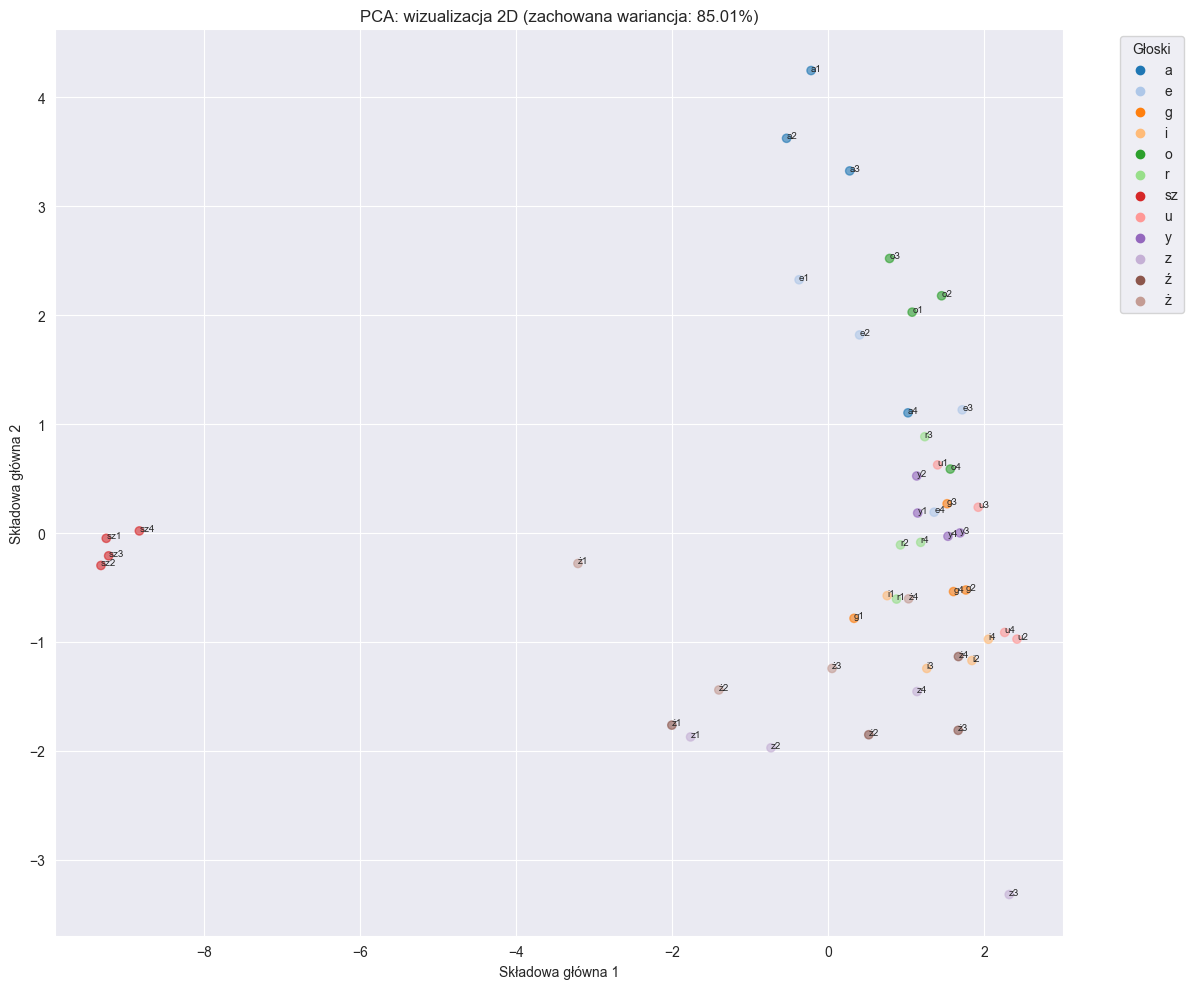

In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Wczytanie danych z pliku
data = np.genfromtxt('151879-clustersel.txt', delimiter='\t')
X = data[:, :-1]
y = data[:, -1].astype(int)

# Lista głosek
GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
etykiety = [GLOSKI[nr % 100] + str(nr // 100) for nr in y]
gloski_skrocone = [e[:-1] for e in etykiety]  # np. 'a', 'e', 'sz'

# PCA do dwóch wymiarów
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
explained_var = np.sum(pca.explained_variance_ratio_) * 100  # procent zachowanej wariancji

# Unikalne głoski i kolory
unikalne_gloski = sorted(set(gloski_skrocone))
palette = sns.color_palette("tab20", len(unikalne_gloski))
kolor_map = {g: palette[i] for i, g in enumerate(unikalne_gloski)}
kolory = [kolor_map[g] for g in gloski_skrocone]

# Rysowanie wykresu
plt.figure(figsize=(12, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kolory, alpha=0.6)

# Dodanie etykiet
for i, pair in enumerate(X_reduced):
    plt.text(pair[0], pair[1], etykiety[i], fontsize=7)

# Legenda
for g in unikalne_gloski:
    plt.scatter([], [], color=kolor_map[g], label=g)
plt.legend(title="Głoski", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title(f'PCA: wizualizacja 2D (zachowana wariancja: {explained_var:.2f}%)')
plt.xlabel("Składowa główna 1")
plt.ylabel("Składowa główna 2")
plt.grid(True)
plt.tight_layout()
plt.show()


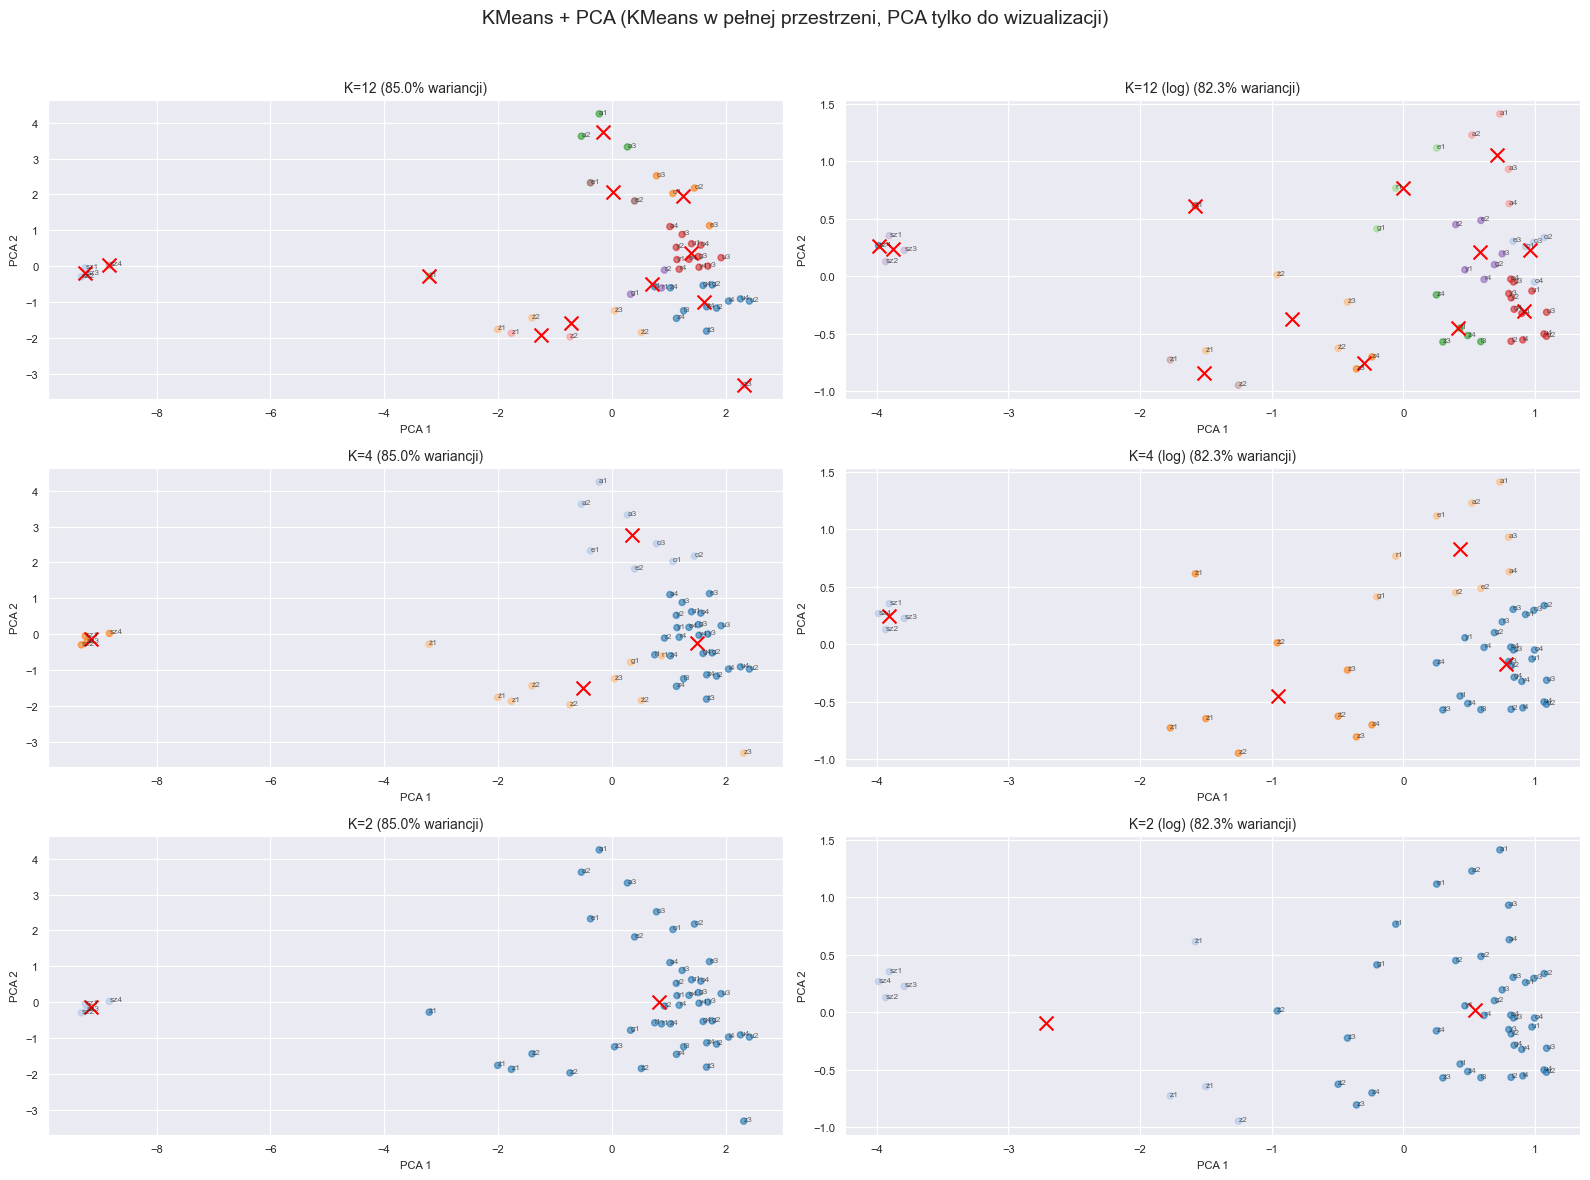

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Wczytanie pliku
file_path = "151879-clustersel.txt"
data = np.genfromtxt(file_path, delimiter='\t')
X = data[:, :-1]
y = data[:, -1].astype(int)

# Głoski
GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
etykiety = [GLOSKI[nr % 100] + str(nr // 100) for nr in y]

# Parametry eksperymentu
ks = [12, 4, 2]
logs = [False, True]

# Przygotowanie subplots
fig, axes = plt.subplots(len(ks), len(logs), figsize=(16, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.25)

# Iteracja po kombinacjach k i logarytmu
for i, k in enumerate(ks):
    for j, log in enumerate(logs):
        suffix = " (log)" if log else ""
        title = f'K={k}{suffix}'

        # Przetwarzanie danych
        X_proc = np.log1p(X) if log else X

        # KMeans w pełnej przestrzeni
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X_proc)
        labels = kmeans.labels_
        centers = kmeans.cluster_centers_

        # PCA do wizualizacji
        pca = PCA(n_components=2)
        X_reduced = pca.fit_transform(X_proc)
        centers_2D = pca.transform(centers)
        explained_var = np.sum(pca.explained_variance_ratio_) * 100

        # Kolory
        palette = sns.color_palette("tab20", k)
        kolory = [palette[label] for label in labels]

        # Rysowanie
        ax = axes[i, j]
        ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kolory, alpha=0.6, s=20)
        ax.scatter(centers_2D[:, 0], centers_2D[:, 1], marker='x', color='red', s=100)
        for idx, txt in enumerate(etykiety):
            ax.text(X_reduced[idx, 0], X_reduced[idx, 1], txt, fontsize=6, alpha=0.7)

        ax.set_title(f'{title} ({explained_var:.1f}% wariancji)', fontsize=10)
        ax.set_xlabel("PCA 1", fontsize=8)
        ax.set_ylabel("PCA 2", fontsize=8)
        ax.tick_params(axis='both', labelsize=8)
        ax.grid(True)

plt.suptitle('KMeans + PCA (KMeans w pełnej przestrzeni, PCA tylko do wizualizacji)', fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


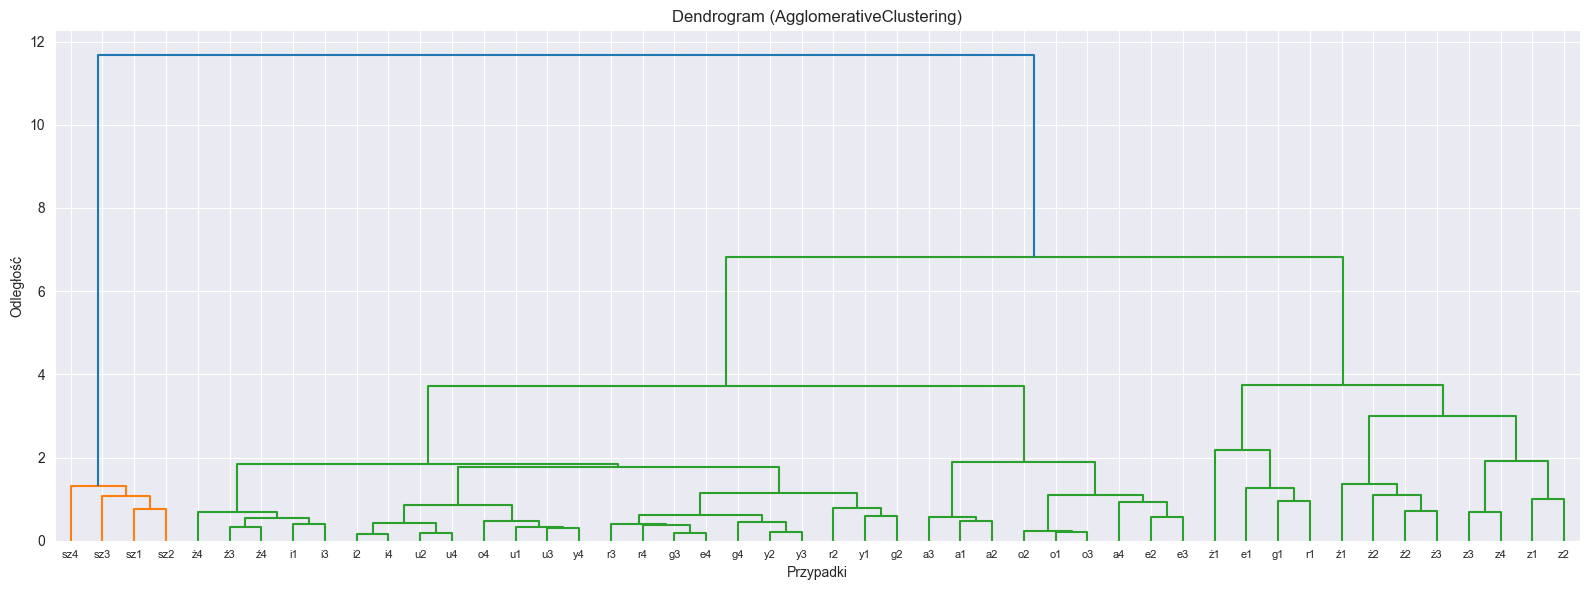

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram

path = "151879-clustersel.txt"

# Funkcja pomocnicza z dokumentacji scikit-learn do rysowania dendrogramu
def plot_dendrogram(model, **kwargs):
    # Tworzymy tablicę dzieci i odległości na podstawie modelu AgglomerativeClustering
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # to jest liść
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([
        model.children_,
        model.distances_,
        counts
    ]).astype(float)

    # Rysujemy dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Wczytanie danych
file_path = path
data = np.genfromtxt(file_path, delimiter='\t')
X = data[:, :-1]
y = data[:, -1].astype(int)

# Głoski jako etykiety
GLOSKI = "a-e-i-o-u-y-sz-z-ź-ż-g-r".split('-')
etykiety = [GLOSKI[nr % 100] + str(nr // 100) for nr in y]

# Logarytmowanie danych (zgodnie z wcześniejszą analizą)
X_log = np.log1p(X)

# Agglomerative Clustering z zachowaniem odległości dla dendrogramu
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, compute_distances=True)
model = model.fit(X_log)

# Rysowanie dendrogramu
plt.figure(figsize=(16, 6))
plot_dendrogram(model, labels=etykiety, leaf_rotation=0, leaf_font_size=8)
plt.title("Dendrogram (AgglomerativeClustering)")
plt.xlabel("Przypadki")
plt.ylabel("Odległość")
plt.tight_layout()
plt.show()


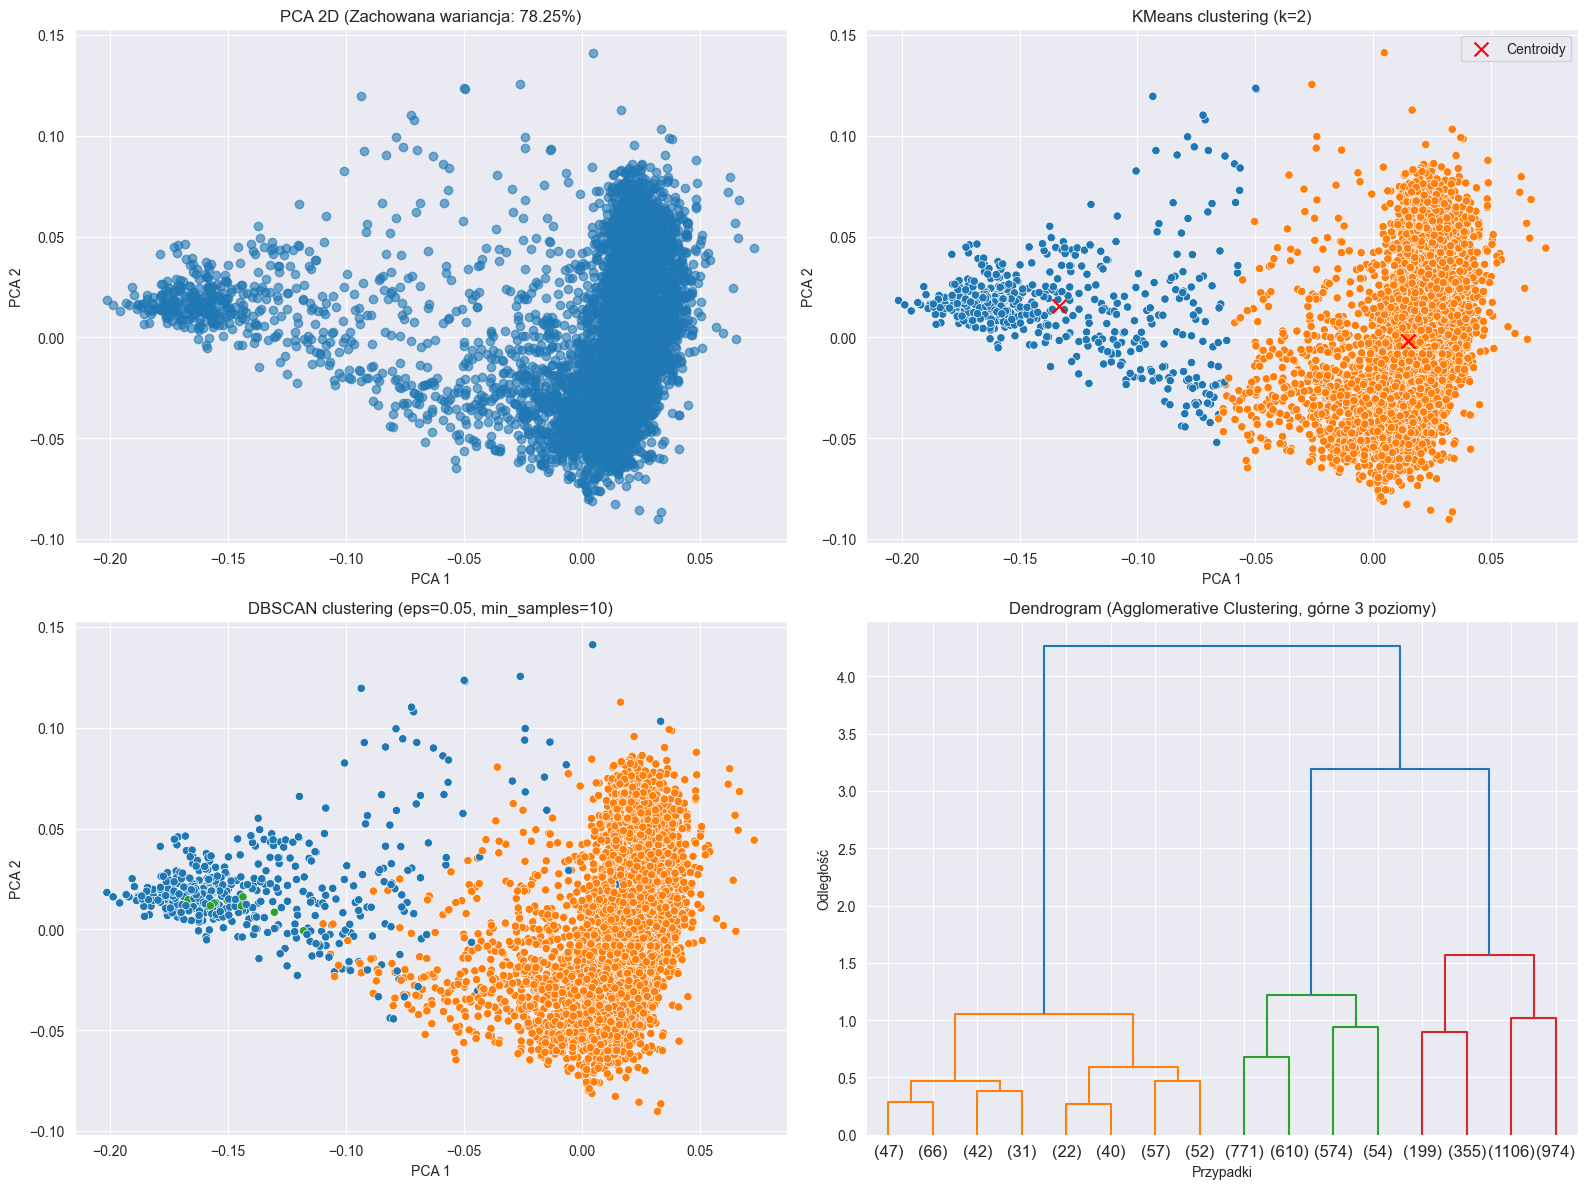

KMeans — Silhouette: 0.610, Calinski-Harabasz: 3446.5, Davies-Bouldin: 0.866
DBSCAN — Silhouette: 0.667, Calinski-Harabasz: 138.5, Davies-Bouldin: 0.433


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram

# Wczytanie danych (brak etykiet)
file_path = "151879-cluster-contspeech.txt"
data = np.genfromtxt(file_path, delimiter='\t')
X = data  # bez ostatniej kolumny

# Logarytmowanie danych
X_log = np.log1p(X)

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_log)
explained_var = np.sum(pca.explained_variance_ratio_) * 100

# Przygotowanie subplotów
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# ----------- 1. PCA WIZUALIZACJA ----------- #
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
axs[0, 0].set_title(f'PCA 2D (Zachowana wariancja: {explained_var:.2f}%)')
axs[0, 0].set_xlabel("PCA 1")
axs[0, 0].set_ylabel("PCA 2")
axs[0, 0].grid(True)

# ----------- 2. KMEANS ----------- #
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X_log)
centroids = pca.transform(kmeans.cluster_centers_)

sns.scatterplot(ax=axs[0, 1], x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10', legend=None)
axs[0, 1].scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroidy')
axs[0, 1].set_title("KMeans clustering (k=2)")
axs[0, 1].set_xlabel("PCA 1")
axs[0, 1].set_ylabel("PCA 2")
axs[0, 1].legend()
axs[0, 1].grid(True)

# ----------- 3. DBSCAN ----------- #
dbscan = DBSCAN(eps=0.05, min_samples=10)
db_labels = dbscan.fit_predict(X_log)

sns.scatterplot(ax=axs[1, 0], x=X_pca[:, 0], y=X_pca[:, 1], hue=db_labels, palette='tab10', legend=None)
axs[1, 0].set_title("DBSCAN clustering (eps=0.05, min_samples=10)")
axs[1, 0].set_xlabel("PCA 1")
axs[1, 0].set_ylabel("PCA 2")
axs[1, 0].grid(True)

# ----------- 4. AGGLOMERATIVE + DENDROGRAM ----------- #
def plot_dendrogram(model, ax, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, ax=ax, **kwargs)

agg_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, compute_distances=True)
agg_model = agg_model.fit(X_log)

plot_dendrogram(agg_model, ax=axs[1, 1], truncate_mode='level', p=3)
axs[1, 1].set_title("Dendrogram (Agglomerative Clustering, górne 3 poziomy)")
axs[1, 1].set_xlabel("Przypadki")
axs[1, 1].set_ylabel("Odległość")

plt.tight_layout()
plt.show()

# ----------- 5. METRYKI JAKOŚCI (dla KMeans i DBSCAN) ----------- #
def evaluate_clustering(X, labels, method_name):
    n_labels = len(set(labels)) - (1 if -1 in labels else 0)
    if n_labels <= 1:
        print(f"{method_name}: nie można obliczyć metryk — wykryto tylko {n_labels} klaster(y)")
        return
    valid = labels != -1
    score_sil = silhouette_score(X[valid], labels[valid])
    score_ch = calinski_harabasz_score(X[valid], labels[valid])
    score_db = davies_bouldin_score(X[valid], labels[valid])
    print(f"{method_name} — Silhouette: {score_sil:.3f}, Calinski-Harabasz: {score_ch:.1f}, Davies-Bouldin: {score_db:.3f}")

evaluate_clustering(X_log, kmeans_labels, "KMeans")
evaluate_clustering(X_log, db_labels, "DBSCAN")


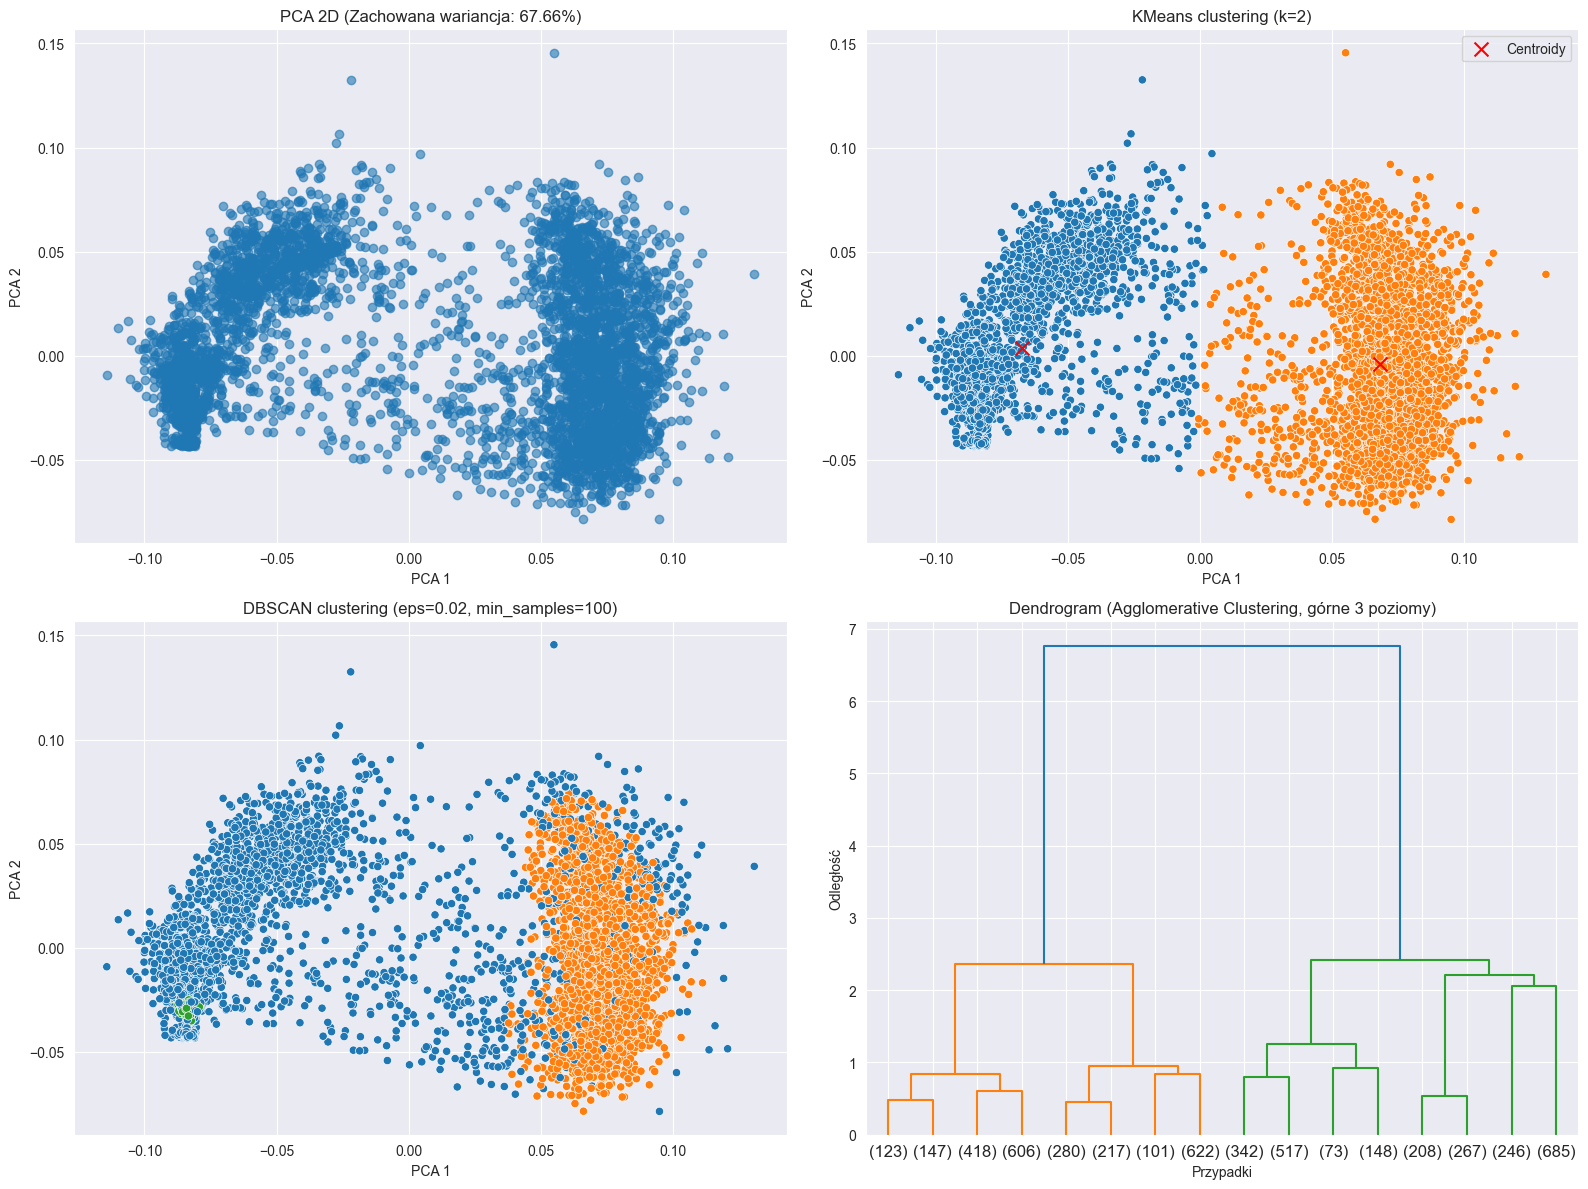

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram

# Wczytanie danych (mowa + instrument, brak etykiet)
file_path = "151879-cluster-contspeechviolin.txt"
data = np.genfromtxt(file_path, delimiter='\t')
X = np.log1p(data)  # logarytmowanie cech

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_var = np.sum(pca.explained_variance_ratio_) * 100

# Przygotowanie subplotów
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# ----------- 1. PCA ----------- #
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
axs[0, 0].set_title(f'PCA 2D (Zachowana wariancja: {explained_var:.2f}%)')
axs[0, 0].set_xlabel("PCA 1")
axs[0, 0].set_ylabel("PCA 2")
axs[0, 0].grid(True)

# ----------- 2. KMEANS ----------- #
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
centroids = pca.transform(kmeans.cluster_centers_)

sns.scatterplot(ax=axs[0, 1], x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10', legend=None)
axs[0, 1].scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroidy')
axs[0, 1].set_title("KMeans clustering (k=2)")
axs[0, 1].set_xlabel("PCA 1")
axs[0, 1].set_ylabel("PCA 2")
axs[0, 1].legend()
axs[0, 1].grid(True)

# ----------- 3. DBSCAN ----------- #
dbscan = DBSCAN(eps=0.02, min_samples=100)
db_labels = dbscan.fit_predict(X)

sns.scatterplot(ax=axs[1, 0], x=X_pca[:, 0], y=X_pca[:, 1], hue=db_labels, palette='tab10', legend=None)
axs[1, 0].set_title("DBSCAN clustering (eps=0.02, min_samples=100)")
axs[1, 0].set_xlabel("PCA 1")
axs[1, 0].set_ylabel("PCA 2")
axs[1, 0].grid(True)

# ----------- 4. AGGLOMERATIVE ----------- #
def plot_dendrogram(model, ax, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, ax=ax, **kwargs)

agg_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, compute_distances=True)
agg_model = agg_model.fit(X)

plot_dendrogram(agg_model, ax=axs[1, 1], truncate_mode='level', p=3)
axs[1, 1].set_title("Dendrogram (Agglomerative Clustering, górne 3 poziomy)")
axs[1, 1].set_xlabel("Przypadki")
axs[1, 1].set_ylabel("Odległość")

plt.tight_layout()
plt.show()


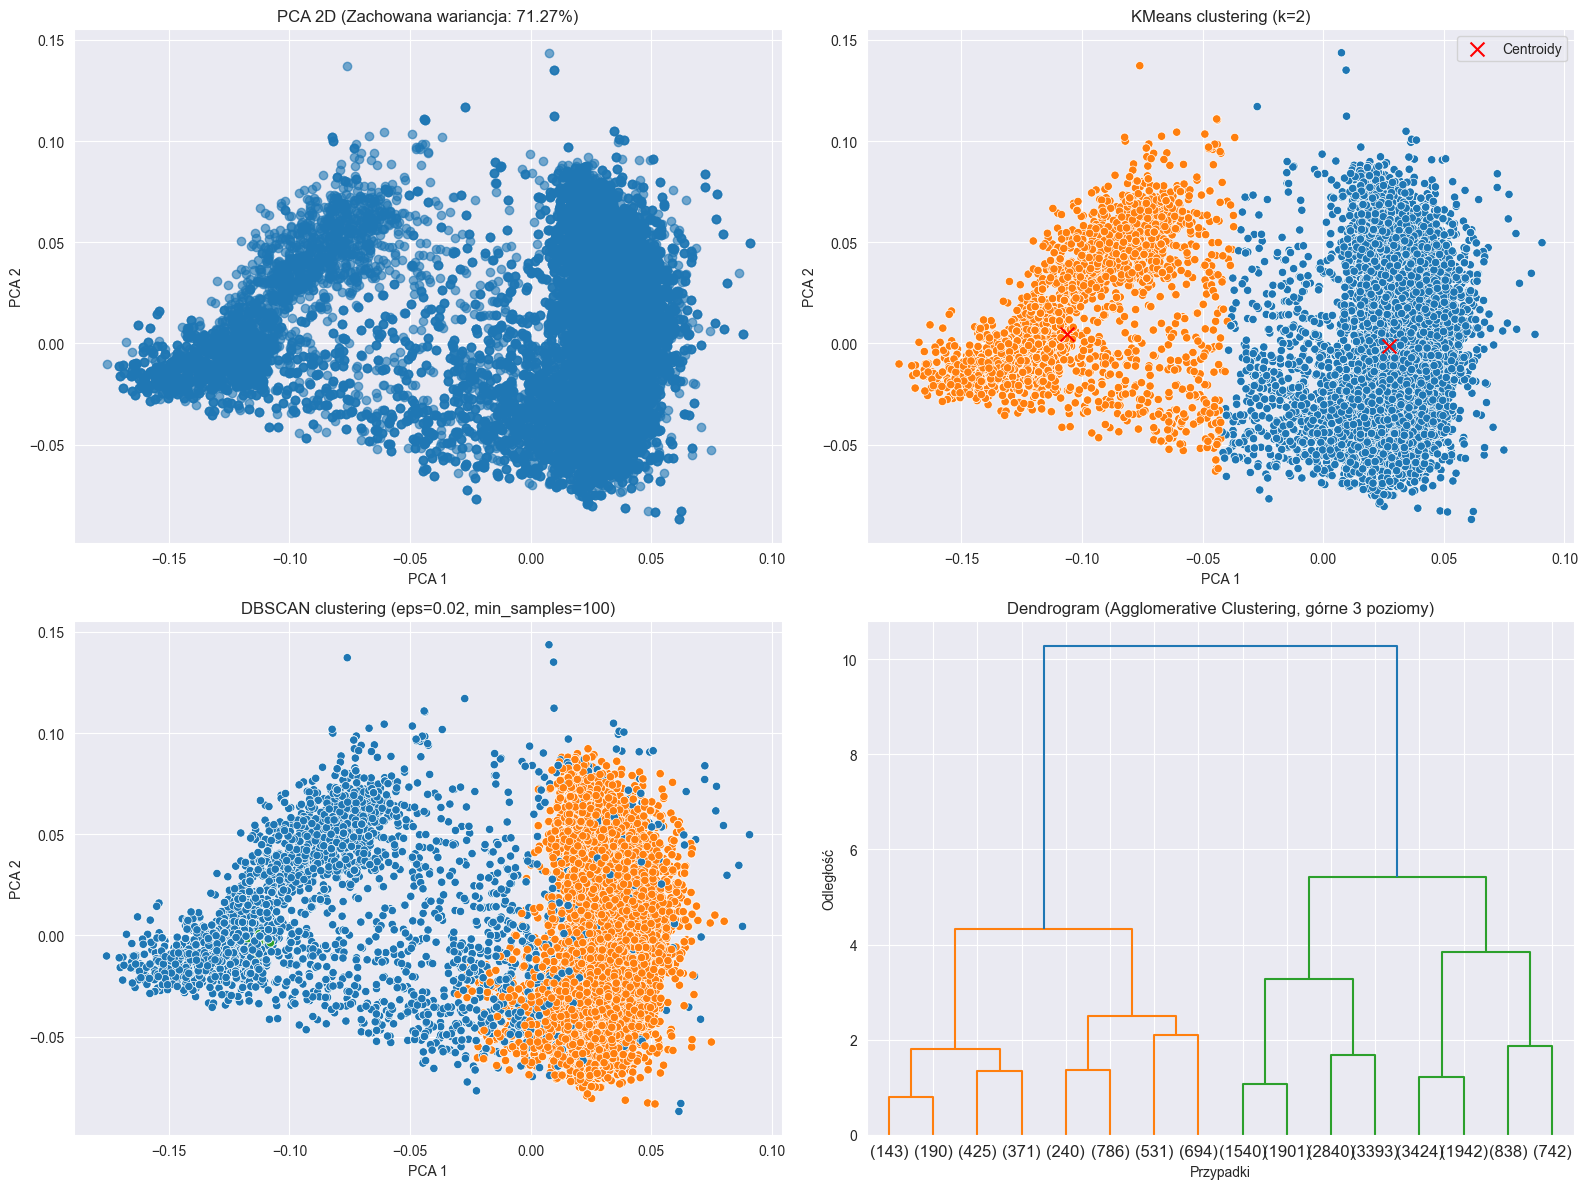

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram

# Wczytanie danych (mowa + instrument, brak etykiet)
file_path = "151879-cluster-contspeechviolin.txt"
data1 = np.genfromtxt(file_path, delimiter='\t')

# Wczytanie danych (brak etykiet)
file_path2 = "151879-cluster-contspeech.txt"
data2 = np.genfromtxt(file_path2, delimiter='\t')
data = np.vstack([data1, data2, data2, data2])
X = np.log1p(data)  # logarytmowanie cech

# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_var = np.sum(pca.explained_variance_ratio_) * 100

# Przygotowanie subplotów
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# ----------- 1. PCA ----------- #
axs[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
axs[0, 0].set_title(f'PCA 2D (Zachowana wariancja: {explained_var:.2f}%)')
axs[0, 0].set_xlabel("PCA 1")
axs[0, 0].set_ylabel("PCA 2")
axs[0, 0].grid(True)

# ----------- 2. KMEANS ----------- #
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
centroids = pca.transform(kmeans.cluster_centers_)

sns.scatterplot(ax=axs[0, 1], x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10', legend=None)
axs[0, 1].scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=100, label='Centroidy')
axs[0, 1].set_title("KMeans clustering (k=2)")
axs[0, 1].set_xlabel("PCA 1")
axs[0, 1].set_ylabel("PCA 2")
axs[0, 1].legend()
axs[0, 1].grid(True)

# ----------- 3. DBSCAN ----------- #
dbscan = DBSCAN(eps=0.02, min_samples=100)
db_labels = dbscan.fit_predict(X)

sns.scatterplot(ax=axs[1, 0], x=X_pca[:, 0], y=X_pca[:, 1], hue=db_labels, palette='tab10', legend=None)
axs[1, 0].set_title("DBSCAN clustering (eps=0.02, min_samples=100)")
axs[1, 0].set_xlabel("PCA 1")
axs[1, 0].set_ylabel("PCA 2")
axs[1, 0].grid(True)

# ----------- 4. AGGLOMERATIVE ----------- #
def plot_dendrogram(model, ax, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    dendrogram(linkage_matrix, ax=ax, **kwargs)

agg_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, compute_distances=True)
agg_model = agg_model.fit(X)

plot_dendrogram(agg_model, ax=axs[1, 1], truncate_mode='level', p=3)
axs[1, 1].set_title("Dendrogram (Agglomerative Clustering, górne 3 poziomy)")
axs[1, 1].set_xlabel("Przypadki")
axs[1, 1].set_ylabel("Odległość")

plt.tight_layout()
plt.show()
